In [1]:
import os

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '../../../credentials/serviceAccountKey.json'

import firebase_admin
from firebase_admin import firestore
import pandas as pd

ModuleNotFoundError: No module named 'firebase_admin'

In [ ]:
try:
    firebase_admin.initialize_app()
except:
    'App already started'

In [ ]:

def get_db():
    db = firestore.client()
    return db


def pull_collection(collection_name, fields=[]):
    db = get_db()
    ballot_ref = db.collection(collection_name)
    docs = ballot_ref.select(fields).stream()
    return pd.DataFrame([doc.to_dict() for doc in docs])



In [ ]:
callouts = [
    u'dancersOfLeeds',
    u'leedsOnWheels',
    u'authorsAbroad',
    u'becomeAWowser',
    u'earlyCareerMusicPromoters',
    u'leedsYoungFilm',
    u'offTheCurriculum',
    u'becomeABarnRaiser',
    u'liftTheLidAudio',
    u'liftTheLidWritten',
    u'nytPlayhouseActingCourse',
    u'meetLeedsLab',
    u'meetLeedsLabAudio',
    u'gillCrawshawCommission',
    u'youthFundWrittenForm',
    u'youthFundAudioVisual'
]


In [ ]:
data = pd.DataFrame()
for callout in callouts:
    collection_name = u'form-builder-submissions/{}/responses'.format(
        callout)
    this_data = pull_collection(
        collection_name=collection_name,
        fields=[
            'dateSubmitted',
        ])
    data = pd.concat([data, this_data])


<Axes: xlabel='dateSubmitted'>

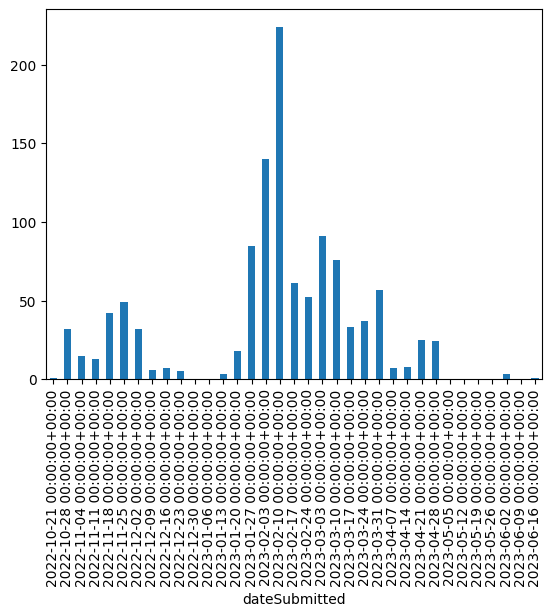

In [ ]:
data.groupby('dateSubmitted').dateSubmitted.count().resample('W-FRI').count().plot.bar()